<a href="https://colab.research.google.com/github/Anschoudary/DeepLearning/blob/main/Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network (CNN)** #

In [3]:
# Libraries

import tensorflow
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt

In [4]:
# Dataset loading

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [7]:

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

print(train_images.ndim)
print(test_images.ndim)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
4
4


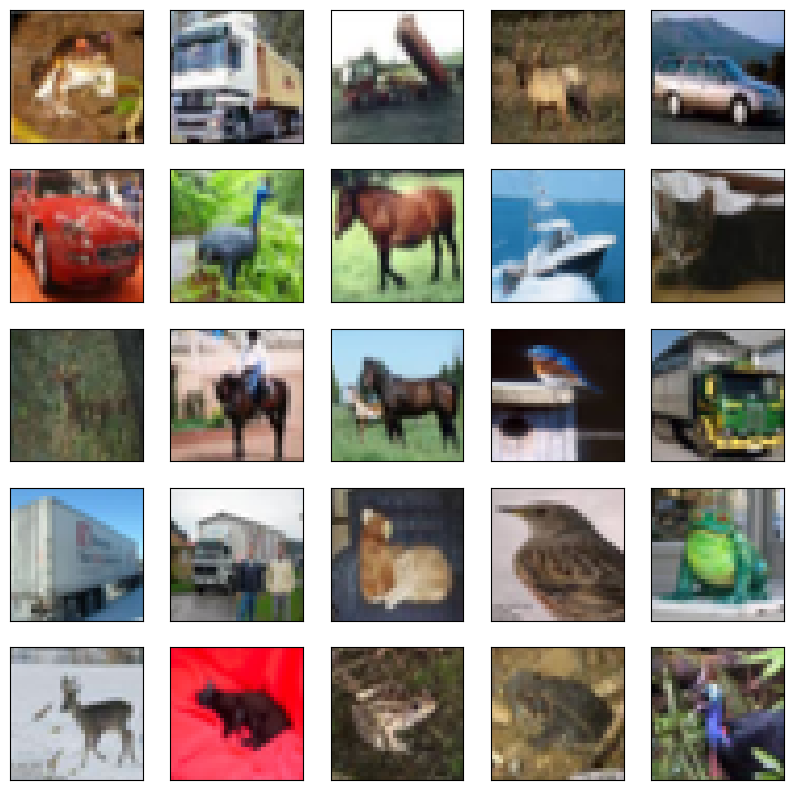

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

plt.show()

In [10]:
# Model Building

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7826 - loss: 0.6151 - val_accuracy: 0.7161 - val_loss: 0.8567
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7925 - loss: 0.5889 - val_accuracy: 0.7109 - val_loss: 0.8880
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.8053 - loss: 0.5502 - val_accuracy: 0.7036 - val_loss: 0.9042
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.8136 - loss: 0.5283 - val_accuracy: 0.7105 - val_loss: 0.8965
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 41ms/step - accuracy: 0.8247 - loss: 0.5011 - val_accuracy: 0.7109 - val_loss: 0.9044
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.8315 - loss: 0.4806 - val_accuracy: 0.7131 - val_loss: 0.9066
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.8386 - loss: 0.4574 - val_accuracy: 0.7121 - val_loss: 0.9440
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.8461 -

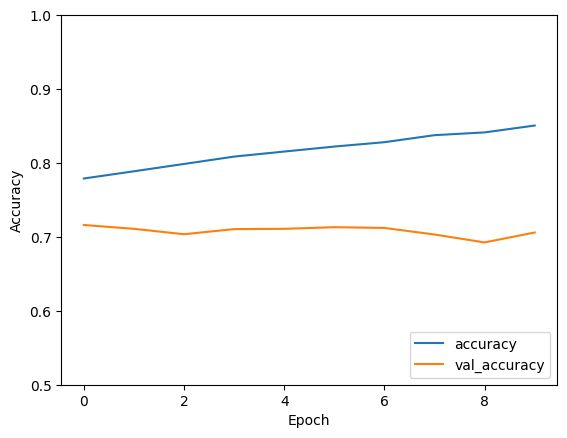

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)
print(test_loss)

313/313 - 4s - 13ms/step - accuracy: 0.7059 - loss: 1.0097
0.7059000134468079
1.0097023248672485


In [32]:
# Testing the model

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array # Import necessary functions

def predict_image(image_path): # Changed 'image' to 'image_path' to avoid confusion
  img = load_img(image_path, target_size=(32, 32)) # Call load_img directly
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)

  # Find the index with the highest value
  predicted_index = np.argmax(classes)

  # Get the predicted class name
  predicted_class = class_names[predicted_index]

  print(f"The image is predicted to be: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[  613.583    -434.82333  -745.1178   -436.5684  -1851.8291   -363.70636
  -1062.9542  -1898.0691   1194.3191   -757.1844 ]]
The image is predicted to be: ship


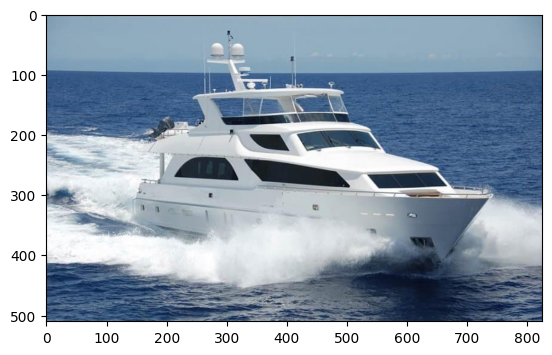

In [33]:
image_path = '/content/boat.jpg' # Changed 'image' to 'image_path'

img = load_img(image_path)
plt.imshow(img)

predict_image(image_path) # Changed 'image' to 'image_path'